In [15]:
g = [[0, None, None, 5, None, None, None, 4, 1, 4, None, 1],
[None , 0, None, None, 4, None, 4, None, 1, None, None, None],
[None , None, 0, 5, None, 4, 3, 4, None, 3, 3, None],
[5, None, 5, 0, None, None, 1, None, None, None, None, 1],
[None , 4, None, None, 0, 4, 4, None, None, None, None, 5],
[None , None, 4, None, 4, 0, 5, None, 3, None, None, 2],
[None , 4, 3, 1, 4, 5, 0, 2, None, None, 5, None],
[4, None, 4, None, None, None, 2, 0, None, None, 1, None],
[1, 1, None, None, None, 3, None, None, 0, 4, 4, None],
[4, None, 3, None, None, None, None, None, 4, 0, 5, 5],
[None , None, 3, None, None, None, 5, 1, 4, 5, 0, 2],
[1, None, None, 1, 5, 2, None, None, None, 5, 2, 0]]

# g = [[0, 4, 3, None, None, 1, None, None, None, None, 5, None],
#      [4, 0, None, 2, 2, None, None, None, None, None, 1, 5],
#      [3, None, 0, None, None, None, None, None, None, 5, None, None],
#      [None, 2, None, 0, None, 4, None, None, None, None, None, None],
#      [None, 2, None, None, 0, None, 1, 3, 4, 4, None, None],
#      [1, None, None, 4, None, 0, 1, None, None, 1, 5, 4],
#      [None, None, None, None, 1, 1, 0, 3, 1, 2, 5, 2],
#      [None, None, None, None, 3, None, 3, 0, None, None, 2, None],
#      [None, None, None, None, 4, None, 1, None, 0, None, None, 3],
#      [None, None, 5, None, 4, 1, 2, None, None, 0, None, None],
#      [5, 1, None, None, None, 5, 5, 2, None, None, 0, None],
#      [None, 5, None, None, None, 4, 2, None, 3, None, None, 0]]


In [16]:


def relax(parents):
    more = True 
    for key, value in parents.items():
      if key != value: 
        parents[key] = parents[value]
        more = False
    if more: relax(parents)

def root(parents, i):
  if parents[i] == i: return i
  return root(parents, parents[i])

def contains(parents, i, target):
  if i == target: return True
  if parents[i] == i: return False
  return root(parents, parents[i])

def init(g):
  edges = []
  parents = {}
  for i, row in enumerate(g):
    parents[i + 1] = i + 1
    
  for i, row in enumerate(g):
    for j, item in enumerate(row):
      if item is None or item == 0 or i > j: continue
      a = i+1
      b = j+1
      edges.append((a, b, item))
  return edges, parents


In [17]:
import networkx as nx
import matplotlib.pyplot as plt


def get_groups(parents):
    groups = {}
    for key, value in parents.items():
        groups.setdefault(value, []).append(key)
    return groups


def print_graph(edges, parents):
    G = nx.Graph()
    draw_edges = [(parents[a], parents[b]) for a, b, w in edges]
    G.add_edges_from(draw_edges)
    labels = {}
    for a, b, w in edges:
        a = root(parents, a)
        b = root(parents, b)
        if a == b:
            continue
        if a > b:
            a, b = b, a

        labels.setdefault((a, b), []).append(str(w))
    labels = {key: ', '.join(arr) for key, arr in labels.items()}
    pos = nx.spring_layout(G)
    # pos = nx.fruchterman_reingold_layout(G)
    # pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, pos)
    groups = get_groups(parents)
    draw_labels = {key: ', '.join([str(i) for i in group])
                   for key, group in groups.items()}
    nx.draw_networkx_labels(G, pos, draw_labels)
    nx.draw_networkx_edges(G, pos, edgelist=labels, arrows=False)
    nx.draw_networkx_edge_labels(G, pos, labels)
    plt.show()


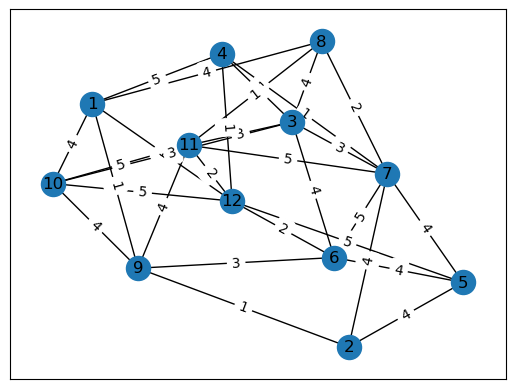

Проводим разрез K1
Q1 = max[qij] = 5
Закорачиваем все ребра графа qij >= Q1
(1, 4) (3, 4) (5, 12) (6, 7) (7, 11) (10, 11) (10, 12)
Получаем граф G1


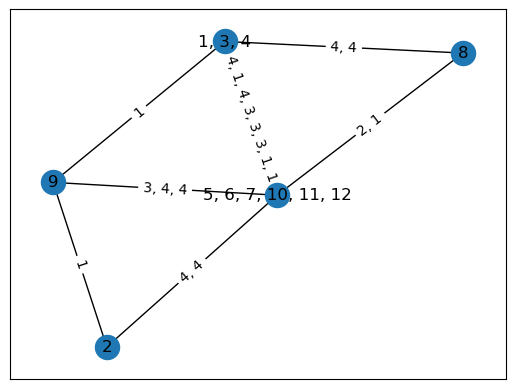

Проводим разрез K2
Q2 = max[qij] = 4
Закорачиваем все ребра графа qij >= Q2
([1, 3, 4], 8) ([1, 3, 4], [5, 6, 7, 10, 11, 12]) (2, [5, 6, 7, 10, 11, 12]) (9, [5, 6, 7, 10, 11, 12])
Получаем граф G2


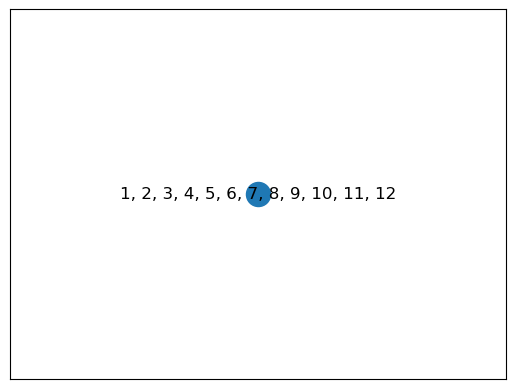

Вершины s-t объединены. Пропускная способность искомого пути Q(P) = 4
Строим граф, вершины которого – вершины исходного графа G, а рёбра – рёбра с пропускной способностью qij ≥ Q(P) = 4.


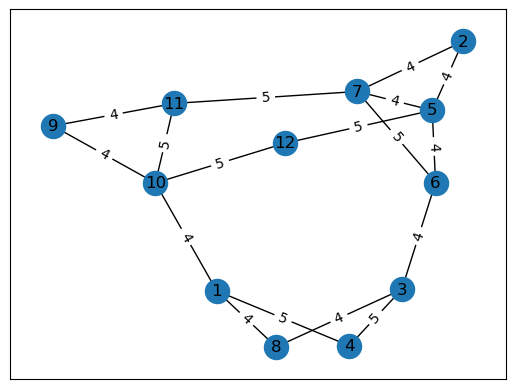

In [18]:

edges, parents = init(g)
s = 1
mx = 666
ans = mx
print_graph(edges, parents)

for i in range(1, 10):
    q = max([max([w for a, b, w in edges if (contains(parents, i, a) or contains(
        parents, i, b)) and root(parents, a) != root(parents, b)], default=mx) for i in range(1, 13) if contains(parents, i, s)], default=mx)
    if q == mx:
        break
    ans = q
    print(f'Проводим разрез K{i}')
    print(f'Q{i} = max[qij] = {q}')
    print(f'Закорачиваем все ребра графа qij >= Q{i}')
    to_cut = [i for (a, b), i in {(root(parents, a), root(parents, b)): (a, b)
                                  for a, b, w in edges if w >= q}.items() if a != b]

    def sus(arr):
        if len(arr) == 1:
            return str(arr[0])
        return '[' + ', '.join([str(i) for i in arr]) + ']'

    groups = get_groups(parents)
    nice = ' '.join(
        [f'({sus(groups[parents[a]])}, {sus(groups[parents[b]])})' for a, b in to_cut])
    print(nice)

    for a, b in to_cut:
        parents[root(parents, b)] = a
        relax(parents)
    
    print(f'Получаем граф G{i}')
    
    print_graph(edges, parents)
    
print(f'Вершины s-t объединены. Пропускная способность искомого пути Q(P) = {ans}')
print(f'Строим граф, вершины которого – вершины исходного графа G, а рёбра – рёбра с пропускной способностью qij ≥ Q(P) = {ans}.')

edges, parents = init(g)
edges = [(a, b, w) for a, b, w in edges if w >= ans]
print_graph(edges, parents)
